# In this example we try to fit a Decision Tree to the famous breast cancer dataset from the UCI repository.
Dataset Description:<br>
Number of instances: 569<br> 
Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)<br>
Target Variable/attribute : diagnosis (B = benign, M = Malignant)<br>

In [95]:
#importing the dataset, the classifier, some visualization libraries.
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

In [96]:
#Loading the breast cancer data set
# Defining X, the attribute data and the target variable Y
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [97]:
# Split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
# Split training data into testing and validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [98]:
#Initializing the classifier and fitting it to the training data
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)
clf.fit(X_train, y_train)
#Prediction on the train data.
y_pred = clf.predict(X_train)
print ('Train accuracy = ' + str(np.sum(y_pred == y_train)*1.0/len(y_train)))

Train accuracy = 0.9615384615384616


In [99]:
#Prediction on the test data.
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.956140350877193


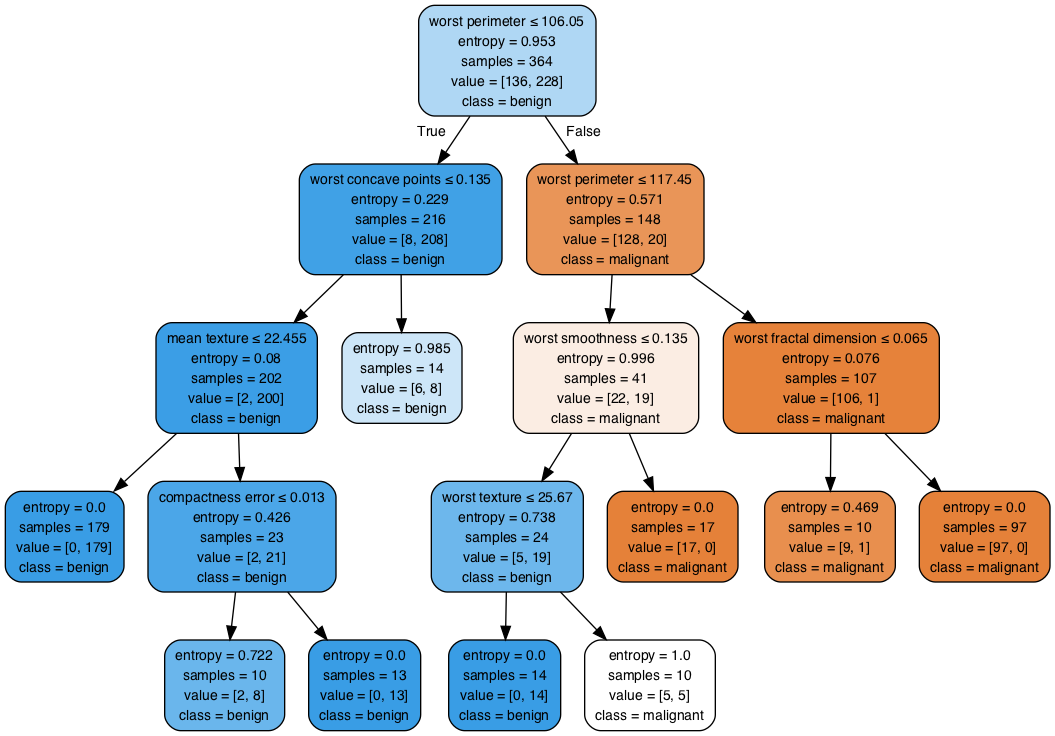

In [100]:
#Visualizing the Decision Tree fitted on our training data.
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=cancer.feature_names, #Passing the feature names
                         class_names=cancer.target_names,    #Passing the target names
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

Validation accuracy for min_samples_leaf 2 = 0.9120879120879121
Validation accuracy for min_samples_leaf 5 = 0.945054945054945
Validation accuracy for min_samples_leaf 10 = 0.9120879120879121
Validation accuracy for min_samples_leaf 20 = 0.9120879120879121
Validation accuracy for min_samples_leaf 50 = 0.8791208791208791


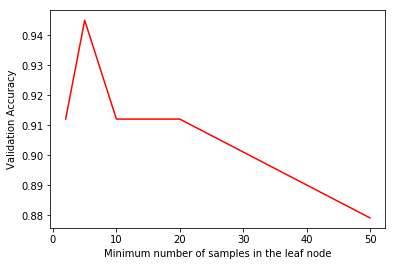

In [101]:
#Using validation set to tune the hyperparameter min_samples_leaf
leaf_size = [2,5,10,20,50]
Val_accuracy = []
for leaf in leaf_size:
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=leaf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    val_acc = np.sum(y_pred == y_valid)*1.0/len(y_valid)
    Val_accuracy.append(val_acc)
    print ('Validation accuracy for min_samples_leaf ' + str(leaf) + ' = ' + str(val_acc))

figure = plt.figure()
plt.plot(leaf_size,Val_accuracy,'r-')
plt.xlabel("Minimum number of samples in the leaf node")
plt.ylabel("Validation Accuracy")
plt.show()

In [103]:
#Concatenating the train and valid dataset after hyperparamter is fixed.
X_train = np.concatenate((X_train, X_valid))
y_train = np.concatenate((y_train, y_valid))
#Fitting the classifier to the data
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5)
clf.fit(X_train, y_train)
#Prediction on the test dataset
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.9824561403508771


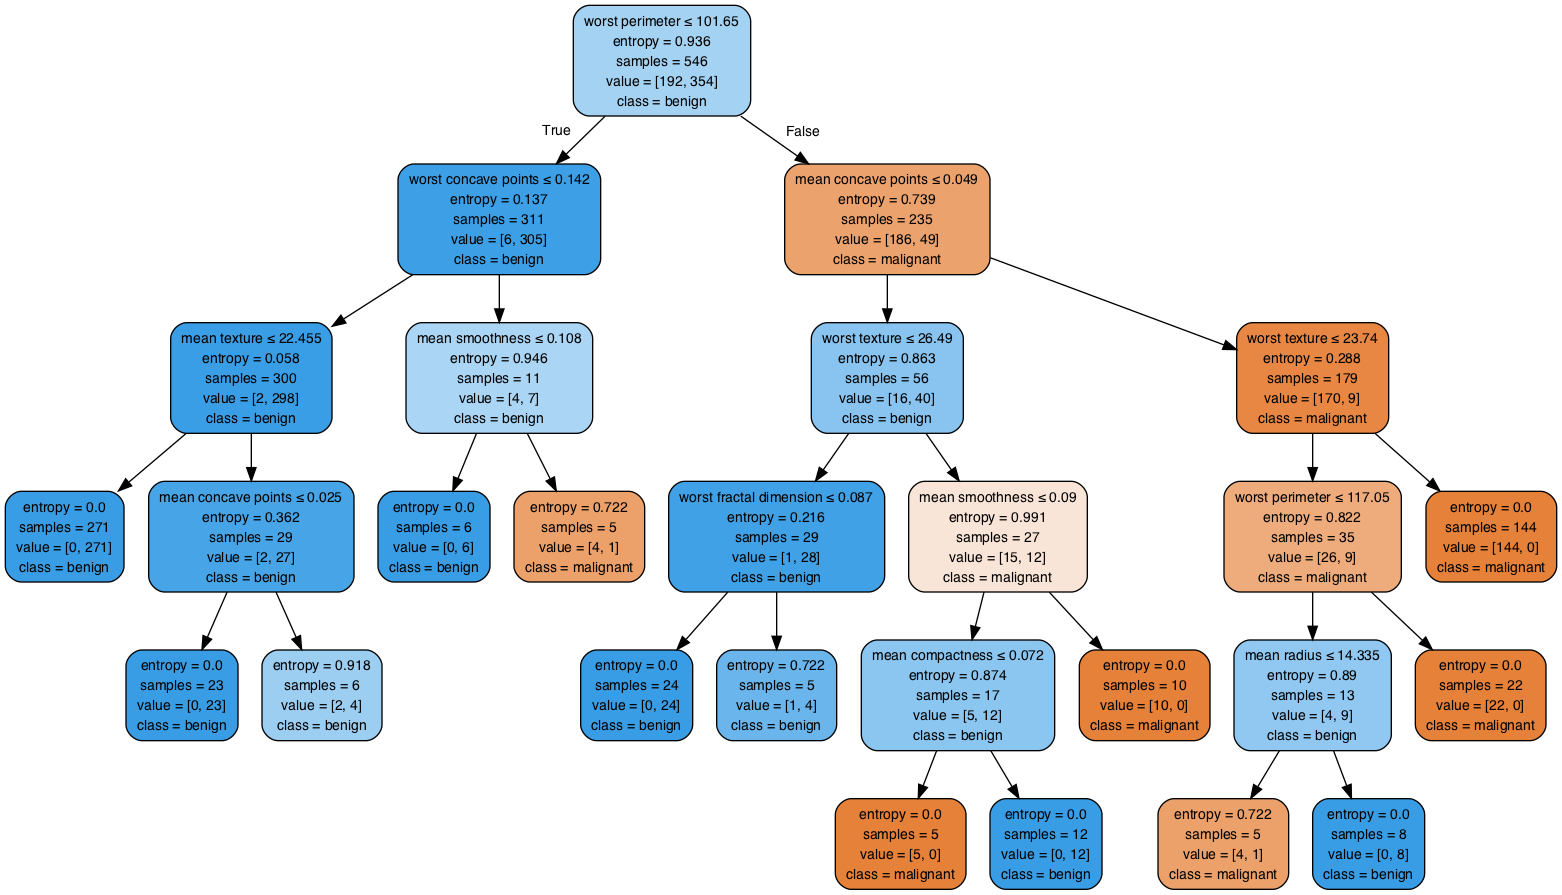

In [104]:
#Visualizing the Decision Tree fitted on our training data.
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=cancer.feature_names,  #Passing feature names
                         class_names=cancer.target_names,     #Passing target names
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 